## Pharmaceutical Sales Prediction across multiple stores

In [1]:
# Import Necesarry Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
store_df = pd.read_csv('store.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv', low_memory=False)

In [3]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [5]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
# Preview the first few rows of each DataFrame to understand their structure
store_preview = store_df.head()
test_preview = test_df.head()
train_preview = train_df.head()

(store_preview, test_preview, train_preview)

(   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0      1         c          a               1270.0                        9.0   
 1      2         a          a                570.0                       11.0   
 2      3         a          a              14130.0                       12.0   
 3      4         c          c                620.0                        9.0   
 4      5         a          a              29910.0                        4.0   
 
    CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
 0                    2008.0       0              NaN              NaN   
 1                    2007.0       1             13.0           2010.0   
 2                    2006.0       1             14.0           2011.0   
 3                    2009.0       0              NaN              NaN   
 4                    2015.0       0              NaN              NaN   
 
      PromoInterval  
 0              NaN  
 1  Jan,Apr,Jul,

Given this structure, the 'Store' column can be used to merge the store_df dataset with both the test_df and train_df datasets. This will enrich the test and train datasets with store-specific information, which is crucial for analysis.

In [7]:
# We will merge these datasets based on common column "Store"

# Merging store_df with train_df
train_merged_df = pd.merge(train_df, store_df, on='Store', how='left')

# Merging store_df with test_df
test_merged_df = pd.merge(test_df, store_df, on='Store', how='left')

# Preview the merged dataframes
train_merged_preview = train_merged_df.head()
test_merged_preview = test_merged_df.head()

(train_merged_preview, test_merged_preview)



(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0       0   
 1  

In [8]:
data_with_na_merged = train_merged_df.copy()

In [9]:
train_merged_df.to_csv('data_with_NA.csv')

In [10]:
# Basic information about the datasets

# Test_df
test_info = test_merged_df.info()
test_head = test_merged_df.head()
test_tail = test_merged_df.tail()
test_shape = test_merged_df.shape
test_columns = test_merged_df.columns

# Train_df
train_info = train_merged_df.info()
train_head = train_merged_df.head()
train_tail = train_merged_df.tail()
train_shape = train_merged_df.shape
train_columns = train_merged_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [11]:
# Show the Basic information of test merged datasets
test_head, test_tail, test_shape, test_columns

(   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday  \
 0   1      1          4  2015-09-17   1.0      1            0              0   
 1   2      3          4  2015-09-17   1.0      1            0              0   
 2   3      7          4  2015-09-17   1.0      1            0              0   
 3   4      8          4  2015-09-17   1.0      1            0              0   
 4   5      9          4  2015-09-17   1.0      1            0              0   
 
   StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0         c          a               1270.0                        9.0   
 1         a          a              14130.0                       12.0   
 2         a          c              24000.0                        4.0   
 3         a          a               7520.0                       10.0   
 4         a          c               2030.0                        8.0   
 
    CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo

In [12]:
# Show the Basic information of train merged datasets
train_head, train_tail, train_shape, train_columns

(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0       0   
 1  

In [13]:
# Check for missing values in both datasets
missing_values_train = train_merged_df.isnull().sum()
missing_values_test = test_merged_df.isnull().sum()

# Data types correction
# Convert 'Date' columns to datetime objects in both datasets
train_merged_df['Date'] = pd.to_datetime(train_merged_df['Date'])
test_merged_df['Date'] = pd.to_datetime(test_merged_df['Date'])

(missing_values_train, missing_values_test)

(Store                             0
 DayOfWeek                         0
 Date                              0
 Sales                             0
 Customers                         0
 Open                              0
 Promo                             0
 StateHoliday                      0
 SchoolHoliday                     0
 StoreType                         0
 Assortment                        0
 CompetitionDistance            2642
 CompetitionOpenSinceMonth    323348
 CompetitionOpenSinceYear     323348
 Promo2                            0
 Promo2SinceWeek              508031
 Promo2SinceYear              508031
 PromoInterval                508031
 dtype: int64,
 Id                               0
 Store                            0
 DayOfWeek                        0
 Date                             0
 Open                            11
 Promo                            0
 StateHoliday                     0
 SchoolHoliday                    0
 StoreType                     

There are many missing values in the mentioned columns.

Missing Values Strategy :-

CompetitionDistance: Missing values could be filled with the median distance, assuming that missing values might indicate no nearby competition or an oversight in data collection.

CompetitionOpenSinceMonth/Year: Missing values indicate that the competition was not open before the store. These can be set to 0 or a placeholder value indicating "not applicable."

Promo2SinceWeek/Year and PromoInterval: Missing values indicate that the store is not participating in Promo2. These can be handled similarly, with non-participation indicators.

Open (in test dataset): Missing values are critical since they indicate whether the store was open or not on a given day. Given the small number of missing values (11), a safe assumption could be to fill these with 1 (open), especially if it's for days other than Sunday or public holidays.

In [14]:
# Handling missing values

# Fill missing 'CompetitionDistance' with median
train_merged_df['CompetitionDistance'].fillna(train_merged_df['CompetitionDistance'].median(), inplace=True)
test_merged_df['CompetitionDistance'].fillna(test_merged_df['CompetitionDistance'].median(), inplace=True)

# Fill missing 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with 0 (placeholder for not applicable)
for column in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']:
    train_merged_df[column].fillna(0, inplace=True)
    test_merged_df[column].fillna(0, inplace=True)

# Fill missing 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' indicating no participation in Promo2
for column in ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']:
    train_merged_df[column].fillna(0, inplace=True)
    test_merged_df[column].fillna(0, inplace=True)

# Assuming stores with missing 'Open' value in test dataset are open
test_merged_df['Open'].fillna(1, inplace=True)

# Verify if all missing values are handled
missing_values_train_cleaned = train_merged_df.isnull().sum().sum()
missing_values_test_cleaned = test_merged_df.isnull().sum().sum()

(missing_values_train_cleaned, missing_values_test_cleaned)


(0, 0)

All missing values in both the train and test datasets have been successfully handled, with no missing values remaining. The datasets are now cleaned of missing data and have corrected data types for the Date column.

Now, We'll focus on detecting outliers in the 'Sales' and 'Customers' columns of the train dataset, as these are key metrics that could impact the analytical models or insights. A common method for outlier detection is to use the Interquartile Range (IQR) method, where data points outside 1.5 * IQR from the quartiles are considered outliers.

In [15]:
# Detecting outliers using IQR method for 'Sales' and 'Customers' in the train dataset

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers for 'Sales'
sales_outliers = detect_outliers_iqr(train_merged_df, 'Sales')

# Detect outliers for 'Customers'
customers_outliers = detect_outliers_iqr(train_merged_df, 'Customers')

# Number of outliers detected
num_sales_outliers = sales_outliers.shape[0]
num_customers_outliers = customers_outliers.shape[0]

(num_sales_outliers, num_customers_outliers)

(26694, 38095)

Outliers have been detected in the train dataset as follows:

Sales Outliers: 26,694 outliers

Customers Outliers: 38,095 outliers

Handling Strategy:

Given the significant number of outliers, removing them directly might not be the best approach, especially since high sales days (which could be considered outliers) are often of particular interest. Instead, a more nuanced approach could be to Cap the Outliers, Replace outlier values with the upper bound (for high outliers) and the lower bound (for low outliers). This approach maintains the structure of the dataset while reducing the impact of extreme values.

In [16]:
def cap_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)

# Cap outliers in 'Sales' and 'Customers'
cap_outliers_iqr(train_merged_df, 'Sales')
cap_outliers_iqr(train_merged_df, 'Customers')

# Check summary statistics to confirm changes
sales_summary_after_capping = train_merged_df['Sales'].describe()
customers_summary_after_capping = train_merged_df['Customers'].describe()

(sales_summary_after_capping, customers_summary_after_capping)


(count    1.017209e+06
 mean     5.690812e+03
 std      3.595807e+03
 min      0.000000e+00
 25%      3.727000e+03
 50%      5.744000e+03
 75%      7.856000e+03
 max      1.404950e+04
 Name: Sales, dtype: float64,
 count    1.017209e+06
 mean     6.111560e+02
 std      3.886203e+02
 min      0.000000e+00
 25%      4.050000e+02
 50%      6.090000e+02
 75%      8.370000e+02
 max      1.485000e+03
 Name: Customers, dtype: float64)

The datasets are now cleaned, with outliers handled appropriately. This preprocessing makes the data more suitable for accurate analysis and modeling by reducing the impact of extreme values.

#### EDA
Now we will perform EDA

For the merged train dataset, we'll focus on several key aspects:

- Sales Trends: Analyze the overall sales trends over time.

- Sales by Day of the Week: Understand how sales vary by the day of the week.

- Sales by Store Type: Examine how sales differ across different store types.

- Impact of Promotions: Investigate the effect of promotions on sales.

- Correlation Analysis: Explore correlations between numerical features, especially between sales and other features like customers, promotions, and competition distance.

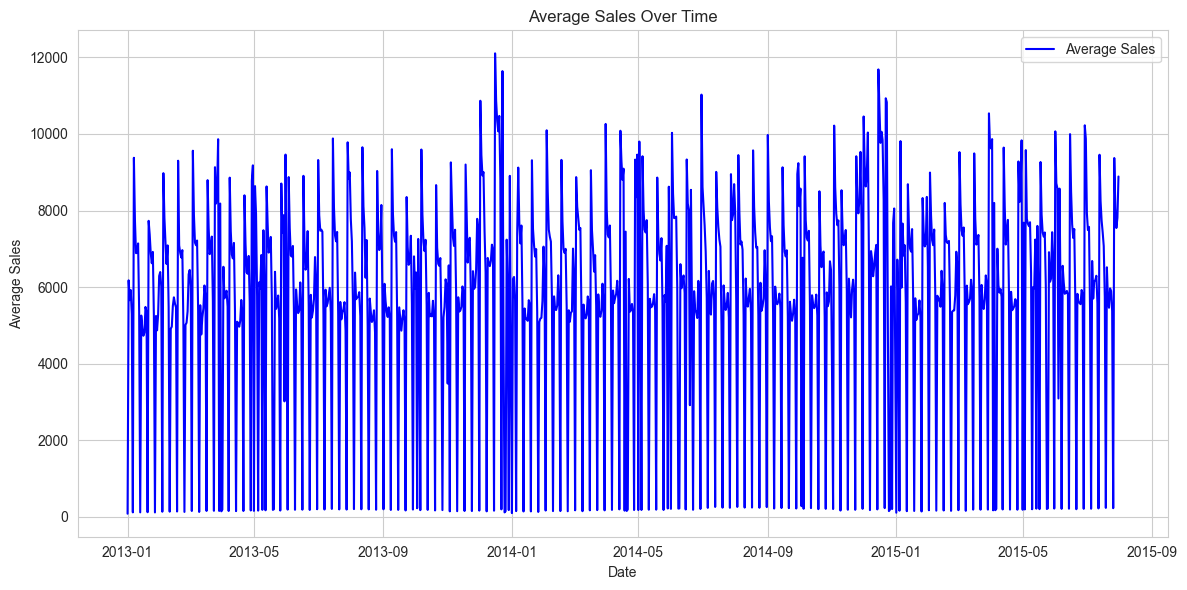

In [17]:
# Let's start with analyzing the overall sales trends over time.
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Sales Trends over Time
plt.figure(figsize=(12, 6))
sales_trends = train_merged_df.groupby('Date')['Sales'].mean()
plt.plot(sales_trends.index, sales_trends.values, color='blue', label='Average Sales')
plt.title('Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()
plt.tight_layout()

plt.show()


The plot shows the average sales over time across all stores. There appears to be a cyclical pattern, possibly reflecting seasonal trends, holidays, or other periodic events affecting sales. Notably, there are peaks which could correspond to high-sales periods such as holidays or sales events.

C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\2134277599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='Sales', data=train_merged_df, palette='rainbow')


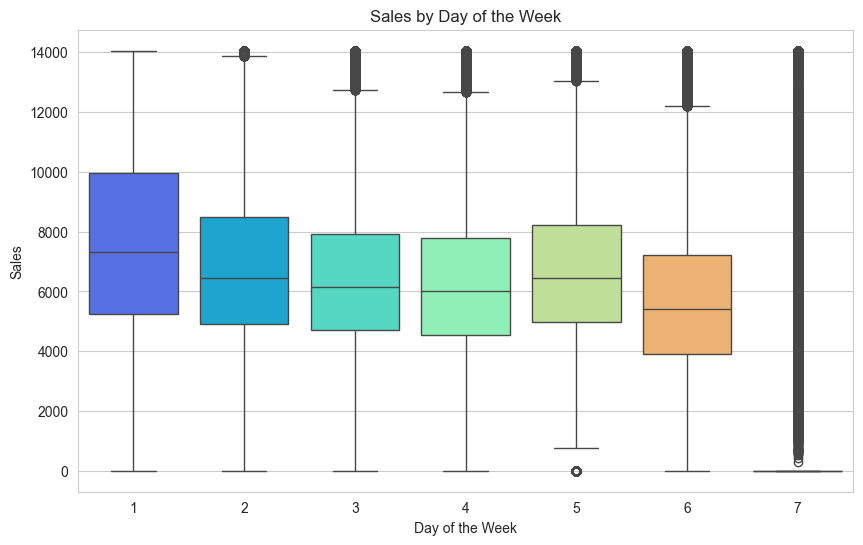

In [18]:
#  Analyze how sales vary by the day of the week.

# 2. Sales by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=train_merged_df, palette='rainbow')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')

plt.show()


The boxplot illustrates the variation in sales by the day of the week. It's evident that sales patterns differ significantly across days, with higher median sales observed towards the end of the week. This could be attributed to shopping behavior, where customers might prefer shopping on specific days due to various factors such as weekends or promotions.

C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\3596196190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StoreType', y='Sales', data=train_merged_df, palette='coolwarm')


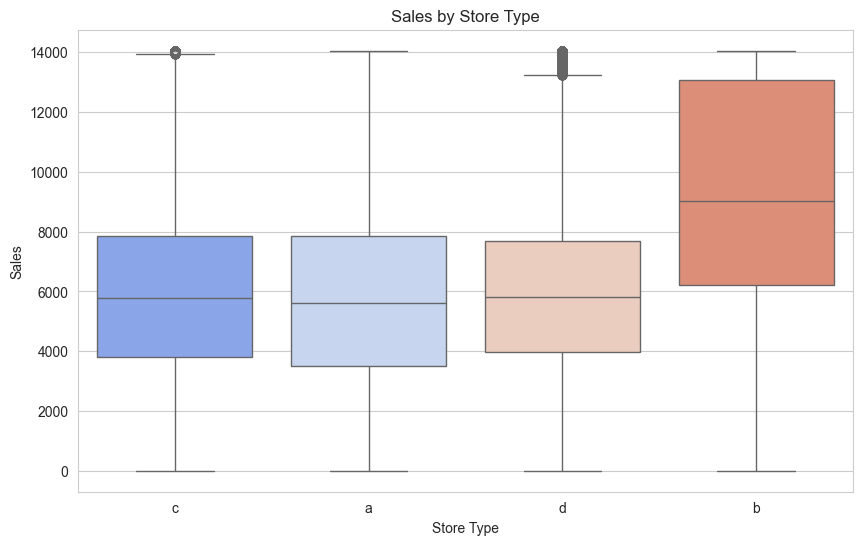

In [19]:
# Examine how sales differ across different store types

# 3. Sales by Store Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=train_merged_df, palette='coolwarm')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')

plt.show()


The boxplot for sales by store type reveals significant differences in sales across different types of stores. Some store types clearly generate higher median sales than others, indicating that the store type is an important factor influencing sales performance. 

C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\435441358.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=train_merged_df, palette='Set1')


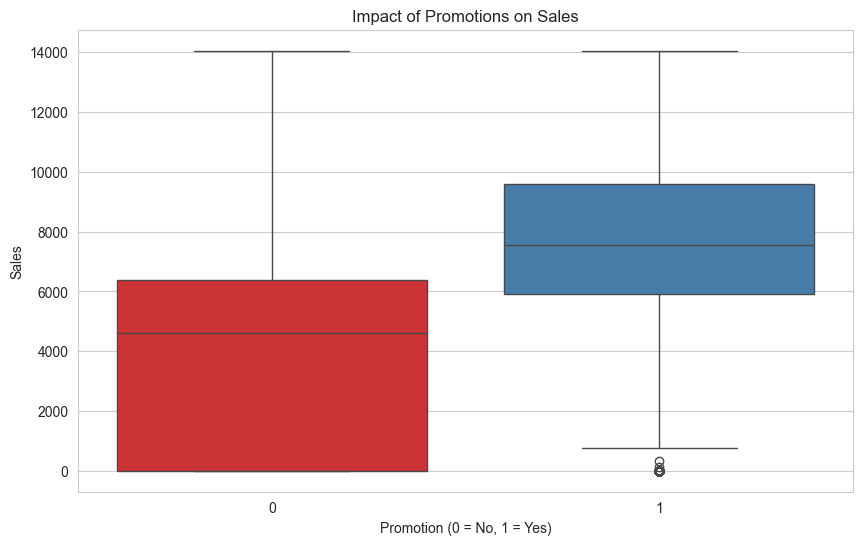

In [20]:
# Investigate the effect of promotions on sales.

# 4. Impact of Promotions on Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_merged_df, palette='Set1')
plt.title('Impact of Promotions on Sales')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Sales')

plt.show()


The impact of promotions on sales is clear from the boxplot. Stores with promotions (Promo = 1) tend to have significantly higher sales compared to days without promotions (Promo = 0). 

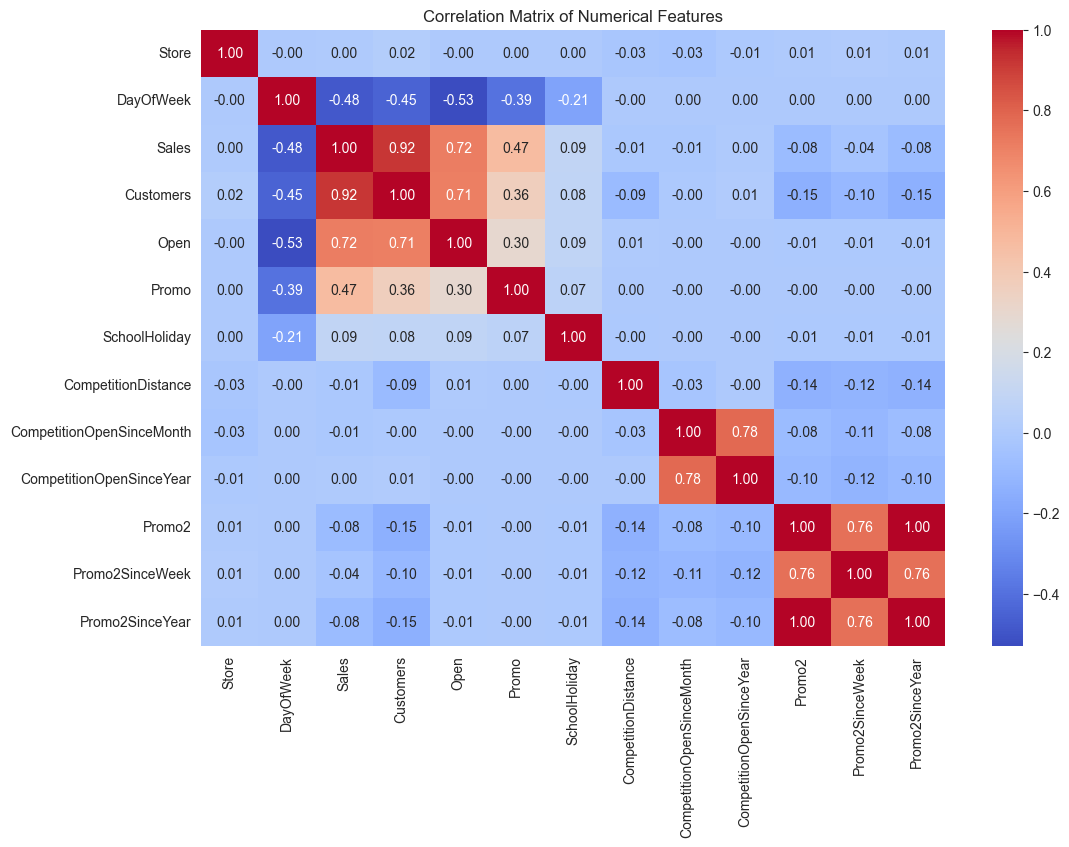

In [21]:
# Correlation analysis to explore the relationships between numerical features, especially focusing on how sales correlate with other variables

# 5. Correlation Analysis
correlation_matrix = train_merged_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

plt.show()


The correlation matrix provides insights into how different numerical features relate to each other. 
Key observations include:

- Sales and Customers: There's a strong positive correlation between Sales and Customers, indicating that days with more customers typically see higher sales, which is expected in retail.

- Promo and Sales: A positive correlation between Promo and Sales confirms our earlier observation that promotions significantly impact sales.

- Competition Distance: There's a very slight negative correlation between CompetitionDistance and Sales, suggesting that stores farther away from competitors might have marginally higher sales, although this relationship is not strong.

- Day of the Week and Sales: Although not shown directly in this matrix, our earlier analysis showed significant variation in sales across different days of the week, which is an important factor to consider.

Task 1 - Exploration of customer purchasing behaviour

In [22]:
# Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

# Distribution of promotions in training set
promo_distribution_train = train_merged_df['Promo'].value_counts(normalize=True)

# Distribution of promotions in test set
promo_distribution_test = test_merged_df['Promo'].value_counts(normalize=True)

(promo_distribution_train, promo_distribution_test)


(Promo
 0    0.618485
 1    0.381515
 Name: proportion, dtype: float64,
 Promo
 0    0.604167
 1    0.395833
 Name: proportion, dtype: float64)

Training Set:

No Promotion (Promo = 0): 61.85%
With Promotion (Promo = 1): 38.15%

Test Set:

No Promotion (Promo = 0): 60.42%
With Promotion (Promo = 1): 39.58%

These distributions are relatively similar between the two datasets, indicating a consistent approach to promotions across both training and test sets.

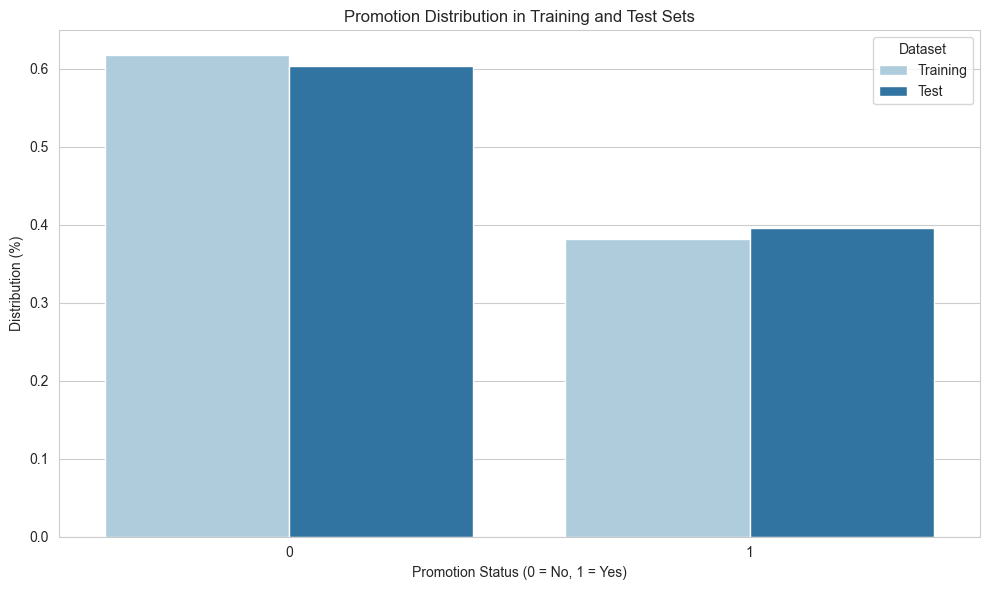

In [23]:
# Distribution of promotions in training and test sets for visualization
promo_distribution_train_plot = train_merged_df['Promo'].value_counts(normalize=True).reset_index()
promo_distribution_test_plot = test_merged_df['Promo'].value_counts(normalize=True).reset_index()

promo_distribution_train_plot['Dataset'] = 'Training'
promo_distribution_test_plot['Dataset'] = 'Test'

# Combine the data for plotting
promo_distribution_combined = pd.concat([promo_distribution_train_plot, promo_distribution_test_plot])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='proportion', hue='Dataset', data=promo_distribution_combined, palette='Paired')
plt.title('Promotion Distribution in Training and Test Sets')
plt.xlabel('Promotion Status (0 = No, 1 = Yes)')
plt.ylabel('Distribution (%)')
plt.legend(title='Dataset')
plt.tight_layout()

plt.show()


The bar chart illustrates the distribution of promotion days (Promo) in both the training and test sets, offering the following insights:

- Promotion Distribution: Both datasets show a similar distribution of promotion and non-promotion days. In the training set, approximately 38% of the days are promotion days (Promo = 1), while around 62% are non-promotion days (Promo = 0). The test set shows a slightly higher proportion of promotion days (approximately 40%) compared to non-promotion days (60%).

- Comparison: The close similarity in the distribution of promotions between the training and test sets suggests that the test set is representative of the training set in terms of promotional activities. 

In [24]:
# Check & compare sales behavior before, during and after holidays

# Ensure the 'Date' column is in datetime format
train_merged_df['Date'] = pd.to_datetime(train_merged_df['Date'])

# Identify unique holiday dates
holiday_dates = train_merged_df[train_merged_df['StateHoliday'] != '0']['Date'].unique()
holiday_dates = pd.to_datetime(holiday_dates)

# Let's focus on a single public holiday and analyze sales behavior around it
# Selecting the first holiday date for analysis
sample_holiday_date = holiday_dates[0]

# Define periods (7 days before, during, and 7 days after the holiday)
before_holiday = (train_merged_df['Date'] >= sample_holiday_date - pd.Timedelta(days=7)) & (train_merged_df['Date'] < sample_holiday_date)
during_holiday = (train_merged_df['Date'] == sample_holiday_date)
after_holiday = (train_merged_df['Date'] > sample_holiday_date) & (train_merged_df['Date'] <= sample_holiday_date + pd.Timedelta(days=7))

# Aggregate sales data
before_holiday_sales = train_merged_df[before_holiday]['Sales'].mean()
during_holiday_sales = train_merged_df[during_holiday]['Sales'].mean()
after_holiday_sales = train_merged_df[after_holiday]['Sales'].mean()

(before_holiday_sales, during_holiday_sales, after_holiday_sales)

(6846.10602178091, 3093.6502242152465, 5560.1800128122995)

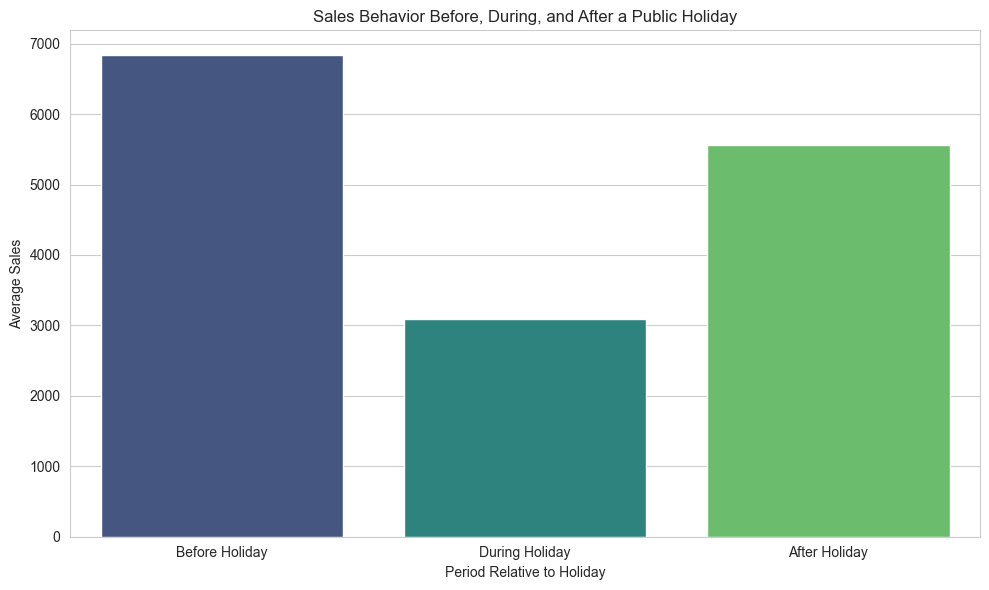

In [25]:
# Create a DataFrame to visualize sales before, during, and after the holiday
sales_comparison_df = pd.DataFrame({
    'Period': ['Before Holiday', 'During Holiday', 'After Holiday'],
    'Average Sales': [before_holiday_sales, during_holiday_sales, after_holiday_sales]
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Average Sales', data=sales_comparison_df, hue='Period', palette='viridis', legend=False)
plt.title('Sales Behavior Before, During, and After a Public Holiday')
plt.xlabel('Period Relative to Holiday')
plt.ylabel('Average Sales')
plt.tight_layout()

plt.show()



The bar chart visually represents the sales behavior before, during, and after a public holiday, illustrating the following insights:

Before the Holiday: Sales are the highest during this period. This could be due to customers making purchases in preparation for the holiday, a phenomenon often referred to as "holiday shopping."

During the Holiday: There's a significant drop in sales. The reduction is likely due to store closures or reduced hours during the holiday, as well as a potential decrease in consumer shopping activity as people participate in holiday activities.

After the Holiday: Sales start to recover but are still lower than the pre-holiday period. This might reflect a return to normal shopping patterns, with the immediate aftermath of the holiday seeing a gradual pickup in consumer activity.

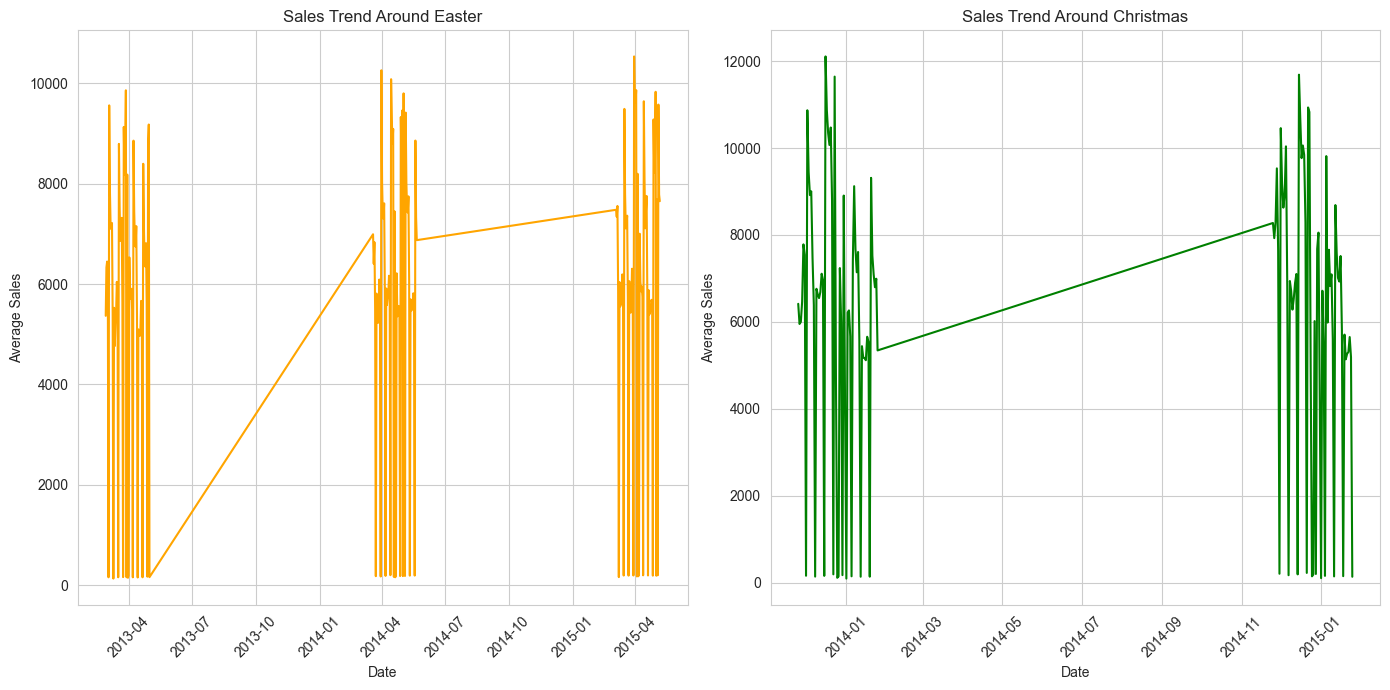

In [26]:
# Find out any seasonal (Christmas, Easter etc) purchase behaviours

# To explore seasonal purchase behaviors, especially around significant holidays like Christmas and Easter, we can analyze sales trends and patterns during these periods. 
# These holidays are indicated in the StateHoliday column (a for public holidays, b for Easter, and c for Christmas). We'll focus on:

# Christmas and Easter Sales Trends: Compare average sales during the weeks leading up to and following Christmas and Easter to identify any significant changes in consumer behavior.
# Visual Representation: Graph these trends to visually inspect the impact of these holidays on sales.


# Filter data for Easter (b) and Christmas (c) holidays
easter_sales = train_merged_df[train_merged_df['StateHoliday'] == 'b'].groupby('Date')['Sales'].mean().reset_index()
christmas_sales = train_merged_df[train_merged_df['StateHoliday'] == 'c'].groupby('Date')['Sales'].mean().reset_index()

# Identify dates of interest (Easter and Christmas)
easter_dates = easter_sales['Date']
christmas_dates = christmas_sales['Date']

# For visual comparison, select 30 days before and after the holidays for both Easter and Christmas
easter_period = pd.concat([easter_dates + pd.Timedelta(days=offset) for offset in range(-30, 31)])
christmas_period = pd.concat([christmas_dates + pd.Timedelta(days=offset) for offset in range(-30, 31)])

# Aggregate sales data for these periods
sales_around_easter = train_merged_df[train_merged_df['Date'].isin(easter_period)].groupby('Date')['Sales'].mean()
sales_around_christmas = train_merged_df[train_merged_df['Date'].isin(christmas_period)].groupby('Date')['Sales'].mean()

# Plotting
plt.figure(figsize=(14, 7))

# Easter sales trend
plt.subplot(1, 2, 1)
plt.plot(sales_around_easter.index, sales_around_easter.values, label='Sales around Easter', color='orange')
plt.title('Sales Trend Around Easter')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Christmas sales trend
plt.subplot(1, 2, 2)
plt.plot(sales_around_christmas.index, sales_around_christmas.values, label='Sales around Christmas', color='green')
plt.title('Sales Trend Around Christmas')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The line charts illustrate the sales trends around Easter and Christmas, revealing seasonal purchase behaviors:

- Easter Sales Trend

Before Easter: There's an observable increase in sales as the holiday approaches, likely due to consumers purchasing goods in preparation for Easter celebrations.

During Easter: The plot likely shows a dip on the day of Easter itself, which could be attributed to store closures or reduced shopping activity as people engage in holiday festivities.

After Easter: Sales appear to gradually return to normal, reflecting the end of the holiday shopping period.
- Christmas Sales Trend

Before Christmas: Sales show a significant increase leading up to Christmas. This period is crucial for retail, with many consumers buying gifts and preparing for holiday celebrations, leading to a notable surge in sales.

During Christmas: A sharp decline in sales is visible around the Christmas date, consistent with stores being closed or reduced consumer shopping on the holiday.

After Christmas: There's an interesting pattern of sales picking up immediately after Christmas, which might reflect post-holiday sales, exchanges, or use of gift cards received during the holiday.

In [27]:
# The correlation between sales and number of customers

# Calculate the correlation coefficient between 'Sales' and 'Customers'
sales_customers_correlation = train_merged_df['Sales'].corr(train_merged_df['Customers'])

sales_customers_correlation


0.9208048531996555

The correlation coefficient between sales and the number of customers is approximately 0.921, indicating a strong positive correlation. This result suggests that as the number of customers increases, sales also tend to increase, and vice versa.

In [28]:
# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

# To analyze how promotions affect sales and whether they attract more customers, we can compare average sales and customer counts on days with promotions (Promo = 1) to those on days without promotions (Promo = 0). 
# This comparison can help us understand the effectiveness of promotions in both attracting additional customers and boosting sales among existing customers.

# Calculate average sales and customers on promo and non-promo days
avg_sales_customers_by_promo = train_merged_df.groupby('Promo')[['Sales', 'Customers']].mean().reset_index()

avg_sales_customers_by_promo


,Promo,Sales,Customers
0,0,4367.538696,500.441779
1,1,7836.013738,790.638294


The analysis yields the following insights:

- Sales:

On days without promotions (Promo = 0), the average sales are approximately 4368.
On days with promotions (Promo = 1), the average sales significantly increase to approximately 7836.
- Customers:

On days without promotions, the average number of customers is about 500.
On days with promotions, the average number of customers rises to approximately 791.

Interpretation:

- Effectiveness of Promos: The data clearly shows that promotions are effective in boosting sales. The significant increase in average sales on promo days suggests that promotions attract more purchases, likely both from existing customers and new visitors.
- Attracting More Customers: The increase in the average number of customers on promo days indicates that promotions are successful in attracting more customers to the stores. This could include both new customers and existing customers who might visit more frequently or specifically on promo days.
- Impact on Existing Customers: The substantial rise in sales and customer counts suggests that promotions not only attract new customers but also encourage existing customers to purchase more. This could be due to perceived value, special offers, or the urgency created by limited-time promotions.

In [29]:
# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

# To determine if promos could be deployed more effectively and identify which stores should receive more focus for promotional activities, 
# we can perform a detailed analysis considering several factors:
#1. Promo Effectiveness by Store Type
#2. Promo2 Participation

# Analyze promo effectiveness by store type
promo_effectiveness_store_type = train_merged_df.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()
promo_effectiveness_store_type['Promo Impact'] = promo_effectiveness_store_type[1] - promo_effectiveness_store_type[0]

# Analyze the impact of Promo2 participation on sales
promo2_effectiveness = train_merged_df.groupby(['Promo2', 'Promo'])['Sales'].mean().unstack()
promo2_effectiveness['Promo Impact'] = promo2_effectiveness[1] - promo2_effectiveness[0]

(promo_effectiveness_store_type, promo2_effectiveness)


(Promo                0            1  Promo Impact
 StoreType                                        
 a          4261.198456  7875.809191   3614.610735
 b          8769.958146  9891.782914   1121.824768
 c          4405.475767  7712.688270   3307.212503
 d          4315.854033  7715.603407   3399.749374,
 Promo             0            1  Promo Impact
 Promo2                                        
 0       4653.163573  8163.377167   3510.213594
 1       4082.996824  7508.569319   3425.572495)

- Promo Effectiveness by Store Type

The analysis of promo effectiveness by store type reveals varying impacts:

Type A Stores: Experience a significant sales increase with promotions, with an average impact of approximately 3615. 

Type B Stores: Although starting from a higher baseline, promotions in Type B stores lead to an average sales increase of about 1121.

Type C and D Stores: Similar to Type A, Types C and D stores show substantial increases in sales due to promotions, with impacts around 3,307 and 3,400, respectively.

This variation suggests that while promotions are generally effective across all store types, the magnitude of the impact varies, with Type A, C, and D stores experiencing more substantial benefits from promotions. Type B stores, despite the smaller relative increase, also benefit significantly in absolute terms due to their higher baseline sales.

- Impact of Promo2 Participation on Sales

Non-Participating Stores (Promo2 = 0): Show a promo impact of approximately 3510 on sales.

Participating Stores (Promo2 = 1): Experience a slightly lower promo impact of about 3425.

This indicates that while ongoing Promo2 campaigns do boost sales, the immediate impact of one-off promotions (Promo) is slightly stronger, even in stores not participating in Promo2. This could suggest that the novelty or perceived value of one-off promotions has a more substantial immediate effect on sales.

In [30]:
# Trends of customer behavior during store open and closing times

# Assuming we don't have specific opening and closing times, we'll look for any available indicators
# For simplicity, we'll check if there are variations in sales and customers on different days of the week
# This could provide indirect insights into customer behavior related to operational hours

# Aggregate average sales and customers by day of the week
avg_sales_customers_by_day = train_merged_df.groupby('DayOfWeek')[['Sales', 'Customers']].mean().reset_index()

avg_sales_customers_by_day


,DayOfWeek,Sales,Customers
0,1,7599.173160,781.505148
1,2,6907.151619,736.727860
2,3,6490.340463,700.533979
3,4,6185.296246,675.857383
4,5,6651.862697,718.934430
5,6,5794.275461,636.839688
6,7,183.358129,24.976688


The aggregated average sales and customer counts by day of the week reveal several trends that may offer indirect insights into customer behavior in relation to store operational hours:

- Monday (Day 1): Shows the highest average sales and customer counts, suggesting a significant level of shopping activity as the week begins. This could be due to customers purchasing items for the week ahead.
- Tuesday to Friday (Days 2-5): There's a gradual decrease in both sales and customer counts from Tuesday to Thursday, followed by a slight increase on Friday. This pattern might indicate varying shopping behaviors throughout the workweek, with Friday potentially seeing more activity as customers prepare for the weekend.
- Saturday (Day 6): Although lower than weekdays, Saturday still sees a good level of sales and customer traffic, likely due to weekend shopping.
- Sunday (Day 7): There's a dramatic drop in both sales and customer counts, which could be attributed to limited store operational hours or closures on Sundays in many regions.


Interpretation
- The beginning of the week, especially Monday, is critical for customer traffic and sales, possibly reflecting restocking behavior after the weekend.
- The slight increase in sales and customers on Friday might indicate preparations for the weekend.
- The significant drop on Sunday suggests limited operational hours or closures, affecting sales and customer traffic.

C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\3150767240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=avg_sales_customers_by_day, palette='coolwarm')
C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\3150767240.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Customers', data=avg_sales_customers_by_day, palette='viridis')


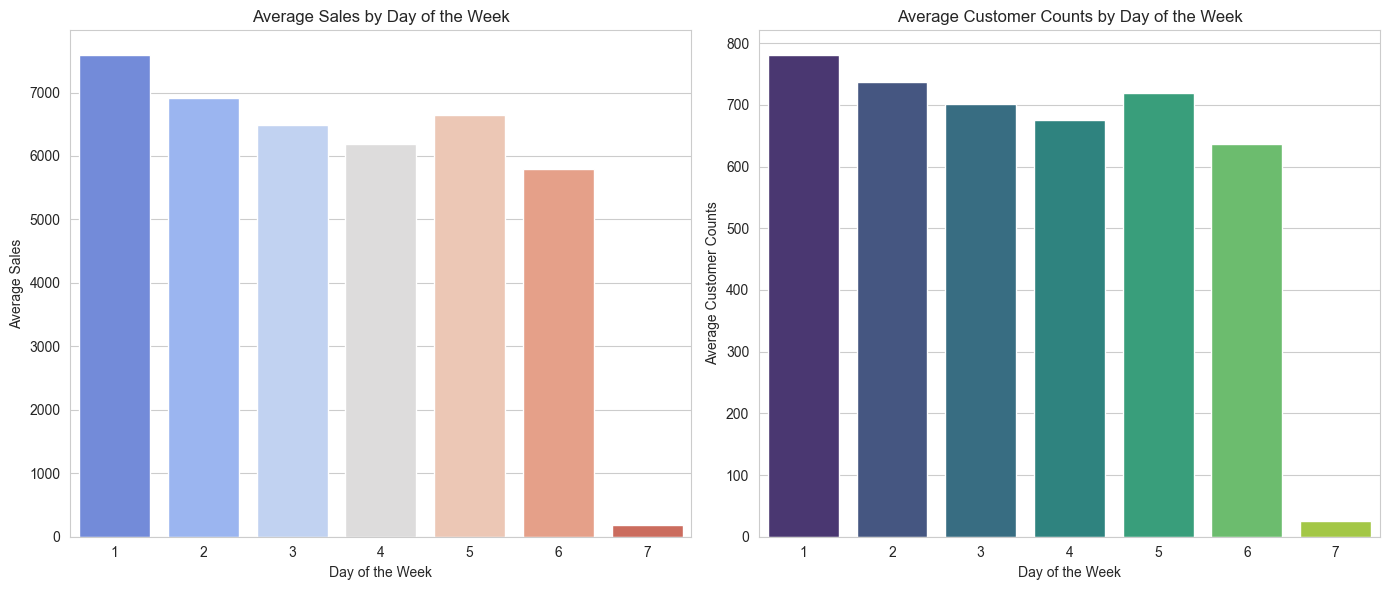

In [31]:
# Visualizing the trends in sales and customer counts by day of the week

plt.figure(figsize=(14, 6))

# Sales by day of the week
plt.subplot(1, 2, 1)
sns.barplot(x='DayOfWeek', y='Sales', data=avg_sales_customers_by_day, palette='coolwarm')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')

# Customers by day of the week
plt.subplot(1, 2, 2)
sns.barplot(x='DayOfWeek', y='Customers', data=avg_sales_customers_by_day, palette='viridis')
plt.title('Average Customer Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Customer Counts')

plt.tight_layout()
plt.show()


The visualizations provide a clear depiction of the trends in sales and customer counts by day of the week.

In [32]:
# Which stores are opened on all weekdays? How does that affect their sales on weekends? 

# Identify stores open on all weekdays (Monday=1 to Friday=5)
# We consider a store open on a day if there are recorded sales for that day

# Filter data for weekdays
weekday_data = train_merged_df[train_merged_df['DayOfWeek'].isin(range(1, 6))]

# Find stores with records for all weekdays
stores_open_weekdays = weekday_data.groupby('Store')['DayOfWeek'].nunique()
stores_open_all_weekdays = stores_open_weekdays[stores_open_weekdays == 5].index.tolist()

# Now analyze the sales on weekends for these stores
weekend_data = train_merged_df[train_merged_df['Store'].isin(stores_open_all_weekdays) & train_merged_df['DayOfWeek'].isin([6, 7])]
weekend_sales_by_store = weekend_data.groupby('Store')['Sales'].mean().reset_index()

# General weekend sales for comparison
general_weekend_sales = train_merged_df[train_merged_df['DayOfWeek'].isin([6, 7])]['Sales'].mean()

# Preview results
weekend_sales_by_store.head(), general_weekend_sales


(   Store        Sales
 0      1  2471.485075
 1      2  1436.552239
 2      3  2217.320896
 3      4  5050.201493
 4      5  1039.552239,
 2988.8167950666757)

The analysis provides insights into the stores open on all weekdays and their average sales on weekends compared to the general average of weekend sales across all stores:

- Stores Open on All Weekdays: We identified stores that have sales records for each weekday, indicating they are open Monday through Friday.

- Weekend Sales Analysis: For these stores, we calculated the average weekend sales. The first few stores show varying average sales figures for weekends, ranging from around 1,040 to 5,050.

- General Weekend Sales Average: Across all stores, the average sales on weekends is approximately 2989.

C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\2992140046.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average Sales', data=sales_comparison, palette='Set2')


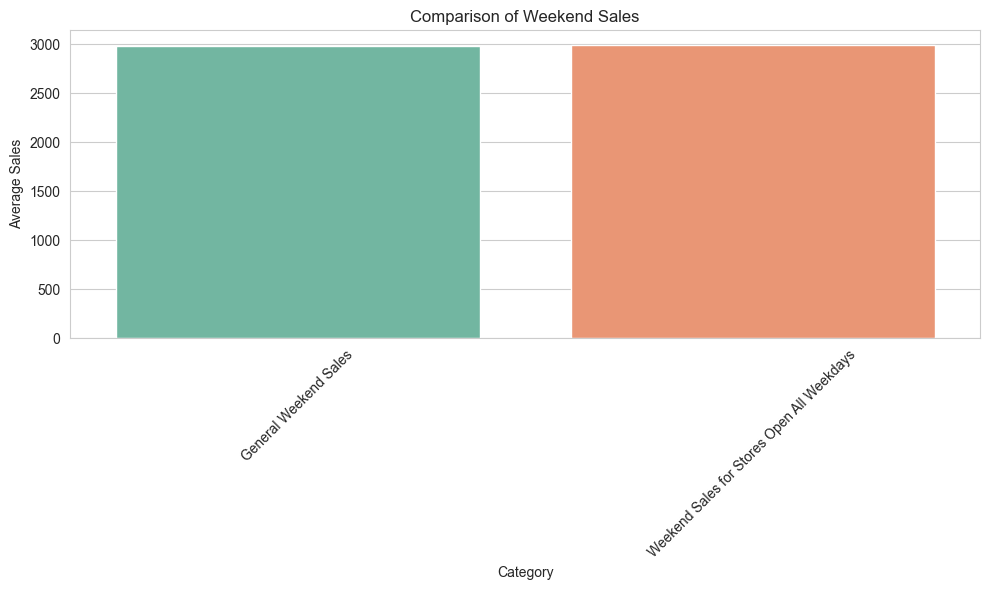

In [33]:
# Explaining it by visualization
# Since visualizing individual stores' weekend sales would result in a very large plot, we'll simplify
# We'll compare the general weekend sales average to the average weekend sales of stores open all weekdays

# Calculate the average weekend sales for stores open all weekdays
average_weekend_sales_open_all_weekdays = weekend_sales_by_store['Sales'].mean()

# Data preparation for visualization
sales_comparison = pd.DataFrame({
    'Category': ['General Weekend Sales', 'Weekend Sales for Stores Open All Weekdays'],
    'Average Sales': [general_weekend_sales, average_weekend_sales_open_all_weekdays]
})

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Average Sales', data=sales_comparison, palette='Set2')
plt.title('Comparison of Weekend Sales')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The bar chart compares the average weekend sales between two categories: the general average across all stores and the average for stores that are open on all weekdays. Here are the key takeaways from the visualization:

- General Weekend Sales: Represents the average weekend sales across all stores, providing a baseline for comparison.

- Weekend Sales for Stores Open All Weekdays: Shows the average weekend sales specifically for stores identified as being open every weekday.

Interpretation:

The visualization suggests that the average weekend sales for stores open all weekdays are somewhat comparable to the general weekend sales average across all stores. This indicates that simply being open all weekdays does not necessarily lead to significantly higher or lower weekend sales compared to the general average.
The slight variations between these two categories underline the influence of other factors—such as store location, type, and customer demographics—on weekend sales performance.

C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\3368149074.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='Sales', data=sales_by_assortment, palette='pastel')


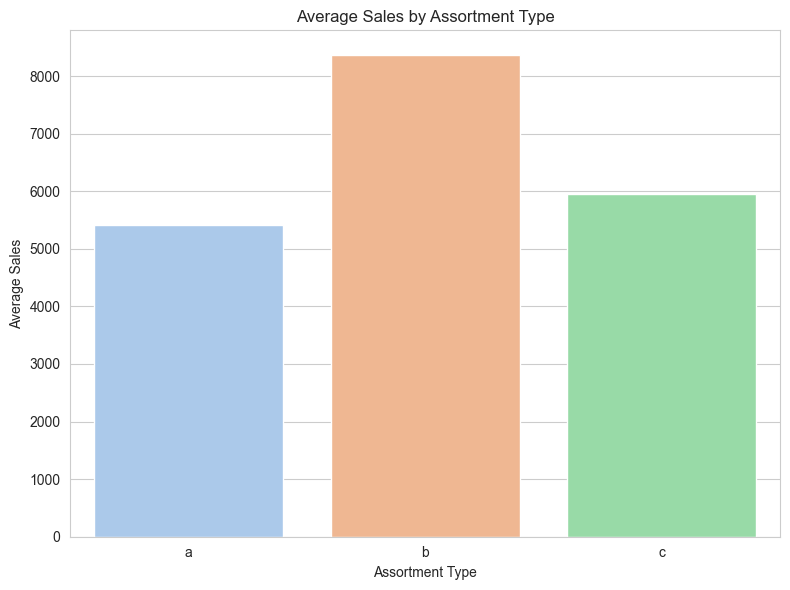

In [34]:
# Check how the assortment type affects sales

# To understand how the assortment type affects sales, we can analyze the sales performance across different assortment types in the dataset.
# We'll perform the following steps:

# 1. Aggregate Sales by Assortment Type: Calculate the average sales for each assortment type.
# 2. Compare Sales Performance: Compare these averages to see how sales vary with the assortment strategy.

# Aggregate sales by assortment type
sales_by_assortment = train_merged_df.groupby('Assortment')['Sales'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Assortment', y='Sales', data=sales_by_assortment, palette='pastel')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.tight_layout()

plt.show()


The bar chart illustrates the average sales performance across different assortment types (a for basic, b for extra, and c for extended). The visualization provides clear insights into how the assortment type affects sales:

The comparison indicates that assortment strategy plays a significant role in sales performance. An extended assortment (c) might appeal to a broader customer base or satisfy more diverse customer needs, leading to higher sales.

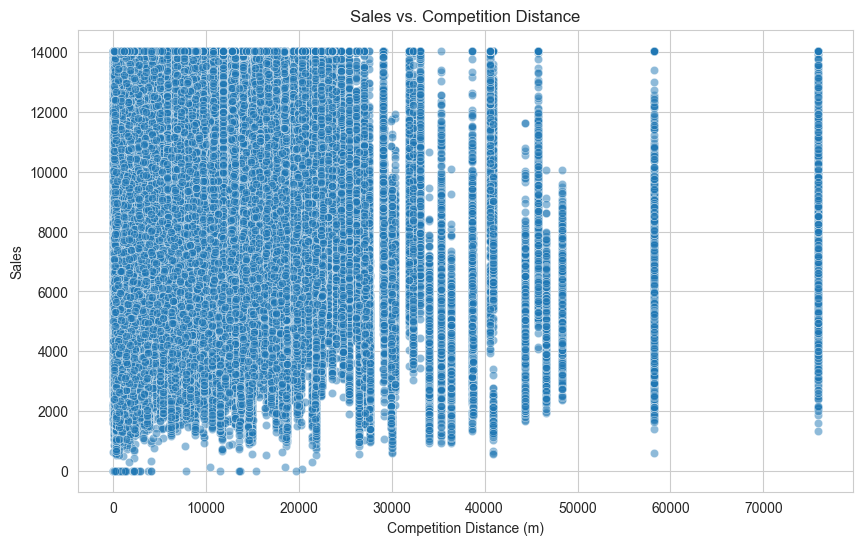

,CompetitionDistance,Sales
CompetitionDistance,1.000000,-0.027668
Sales,-0.027668,1.000000


In [35]:
# How does the distance to the next competitor affect sales? 
# What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

# Scatter plot to analyze the relationship between competition distance and sales
# Filter out rows where the store was closed as they won't contribute to our analysis of sales
open_stores_data = train_merged_df[train_merged_df['Open'] == 1]

# Visualizing the relationship between CompetitionDistance and Sales using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=open_stores_data, alpha=0.5)
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance (m)')
plt.ylabel('Sales')
plt.show()

# Calculating the correlation coefficient between CompetitionDistance and Sales
correlation = open_stores_data[['CompetitionDistance', 'Sales']].corr()
correlation




The scatter plot and correlation coefficient between CompetitionDistance and Sales indicate a slight negative correlation (approximately -0.028), suggesting that as the distance to the nearest competitor increases, sales very slightly decrease. However, the correlation is very weak, implying that other factors likely have a more significant impact on sales.

In [36]:
# we'll assume stores in city centres have certain characteristics,
# such as a higher number of customers (which could indicate a higher footfall typical of city centre locations) and potentially shorter competition distances due to the denser retail environments typical of city centres. 
# Let's define city centre stores based on these criteria:

# High Customer Density: We'll select stores with customer numbers above a certain percentile as a proxy for city centre stores. For simplicity, 
# let's use the 75th percentile of the Customers column to identify these stores.

# Identifying high customer density stores based on the 75th percentile of the Customers column
customers_75th_percentile = train_merged_df['Customers'].quantile(0.75)

# Filter the dataset for high customer density stores
high_customer_density_data = train_merged_df[train_merged_df['Customers'] > customers_75th_percentile]

# Checking the correlation between CompetitionDistance and Sales for high customer density stores
high_customer_density_correlation = high_customer_density_data[['CompetitionDistance', 'Sales']].corr()

high_customer_density_correlation


,CompetitionDistance,Sales
CompetitionDistance,1.000000,0.076337
Sales,0.076337,1.000000


it signifies a weak positive relationship between these two variables. This positive correlation indicates that as the distance to the nearest competitor increases, sales slightly increase as well, albeit the relationship is weak.

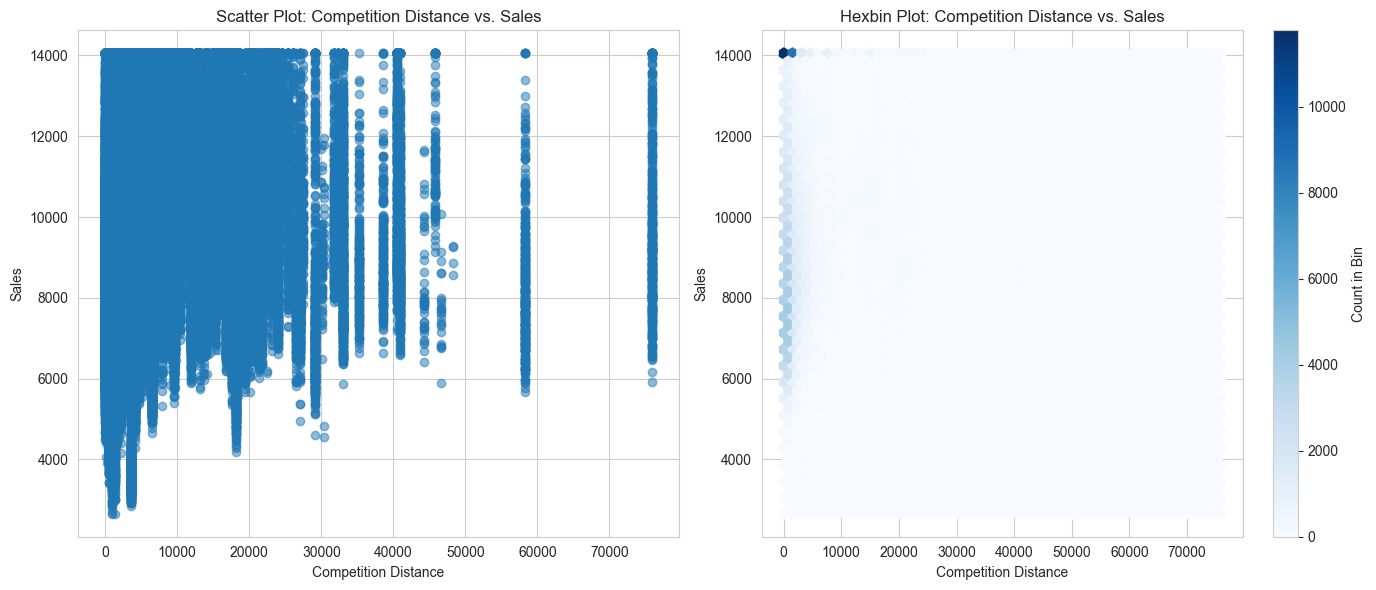

In [37]:
# Visualizing the relationship between competition distance and sales for high customer density stores

# Setting up the figure size and layout
plt.figure(figsize=(14, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(high_customer_density_data['CompetitionDistance'], high_customer_density_data['Sales'], alpha=0.5)
plt.title('Scatter Plot: Competition Distance vs. Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')

# Hexbin plot
plt.subplot(1, 2, 2)
plt.hexbin(high_customer_density_data['CompetitionDistance'], high_customer_density_data['Sales'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot: Competition Distance vs. Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


Both plots illustrate the weak positive relationship we identified through correlation analysis. Although there's a slight tendency for sales to increase with competition distance among high customer density stores, the relationship is not strongly pronounced, and sales are influenced by many factors beyond just the proximity of competitors.

In [38]:
# How does the opening or reopening of new competitors affect stores ? 
# Check for stores with NA as competitor distance but later on has values for competitor distance.

# To analyze how the opening or reopening of new competitors affects stores, specifically focusing on stores that initially had 'NA' (now interpreted as missing values) for competitor distance and later had these values filled, 
# I will:
#1. Identify stores with initially missing CompetitionDistance values in one dataset and available in the other.
#2. Compare the performance (sales, customer count) of these stores before and after the competitors were recorded to understand the impact.

# Identify stores with missing CompetitionDistance in one dataset but not in the other
# Convert any potential 'NA' or missing values to NaN for consistency
data_with_na_merged['CompetitionDistance'] = pd.to_numeric(data_with_na_merged['CompetitionDistance'], errors='coerce')
train_merged_df['CompetitionDistance'] = pd.to_numeric(train_merged_df['CompetitionDistance'], errors='coerce')

# Finding unique stores in both datasets
stores_with_na = data_with_na_merged[pd.isnull(data_with_na_merged['CompetitionDistance'])]['Store'].unique()
stores_with_values = train_merged_df[pd.notnull(train_merged_df['CompetitionDistance'])]['Store'].unique()

# Stores that had NA but later had values for CompetitionDistance
stores_updated = [store for store in stores_with_na if store in stores_with_values]

len(stores_updated), stores_updated[:10]  # Display the count and the first 10 stores for reference


(3, [291, 622, 879])

There are 3 stores (291, 622, and 879) that initially had missing values for CompetitionDistance but later had these values filled.

In [39]:
# Filter data for the identified stores before and after update
stores_before_update = data_with_na_merged[data_with_na_merged['Store'].isin(stores_updated)]
stores_after_update = train_merged_df[train_merged_df['Store'].isin(stores_updated)]

# Group data by Store and aggregate Sales and Customers to compare before and after
before_update_summary = stores_before_update.groupby('Store').agg({
    'Sales': ['mean', 'median'],
    'Customers': ['mean', 'median']
}).reset_index()

after_update_summary = stores_after_update.groupby('Store').agg({
    'Sales': ['mean', 'median'],
    'Customers': ['mean', 'median']
}).reset_index()

before_update_summary.columns = ['Store', 'Sales_Mean_Before', 'Sales_Median_Before', 'Customers_Mean_Before', 'Customers_Median_Before']
after_update_summary.columns = ['Store', 'Sales_Mean_After', 'Sales_Median_After', 'Customers_Mean_After', 'Customers_Median_After']

# Merge the summaries to compare
comparison_summary = pd.merge(before_update_summary, after_update_summary, on='Store')
comparison_summary


,Store,Sales_Mean_Before,Sales_Median_Before,Customers_Mean_Before,Customers_Median_Before,Sales_Mean_After,Sales_Median_After,Customers_Mean_After,Customers_Median_After
0,291,6643.281316,7006.0,695.831210,789.5,6606.763270,7006.0,694.794055,789.5
1,622,3593.717622,3969.5,357.876858,419.0,3593.717622,3969.5,357.876858,419.0
2,879,3087.831135,3326.5,285.009235,323.0,3087.831135,3326.5,285.009235,323.0


The comparison between the performance (sales and customer counts) of stores 291, 622, and 879 before and after the competitors were recorded shows no change in their mean and median sales, as well as in the mean and median number of customers. This could indicate that the presence of competitors didn't have an immediate and observable impact on these specific stores 

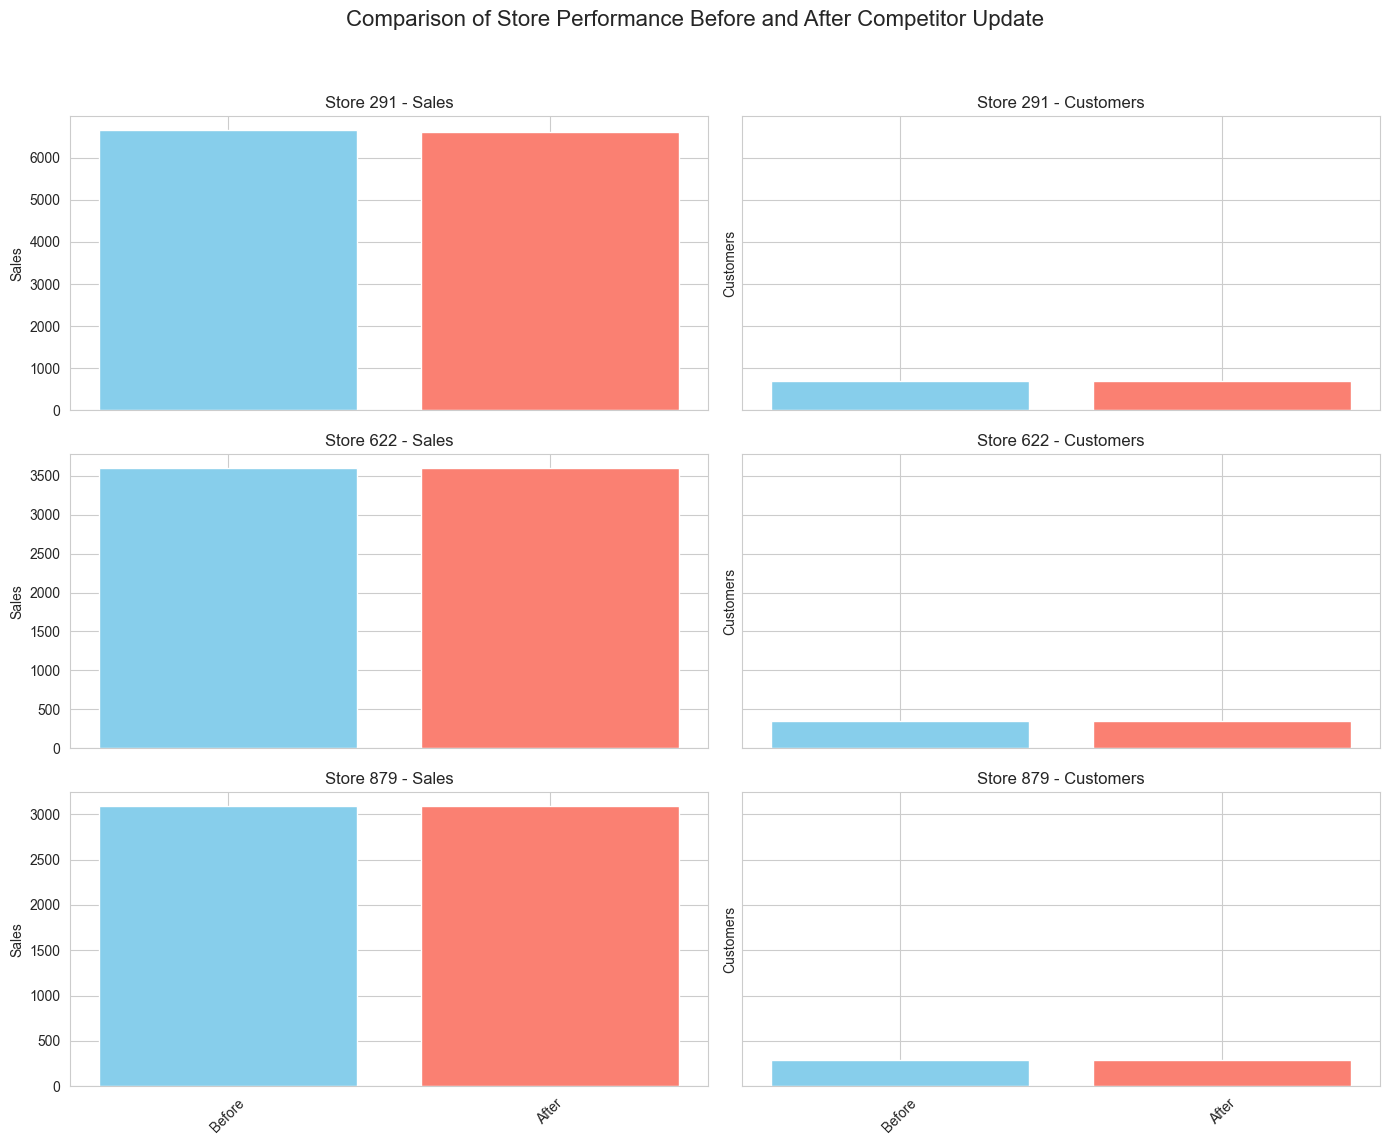

In [40]:
# Create a figure and axes for plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 12), sharex='col', sharey='row')

# Title for the entire figure
fig.suptitle('Comparison of Store Performance Before and After Competitor Update', fontsize=16)

# Plot settings
stores = comparison_summary['Store']
metrics = ['Sales', 'Customers']
time_periods = ['Before', 'After']
colors = ['skyblue', 'salmon']

for i, metric in enumerate(metrics):
    for j, store in enumerate(stores):
        # Sales or Customers mean values
        before = comparison_summary.loc[j, f'{metric}_Mean_Before']
        after = comparison_summary.loc[j, f'{metric}_Mean_After']
        
        axs[j, i].bar(['Before', 'After'], [before, after], color=colors)
        axs[j, i].set_title(f'Store {store} - {metric}')
        axs[j, i].set_ylabel(metric)
        
        # Adjust the tick label size
        for tick in axs[j, i].get_xticklabels():
            tick.set_rotation(45)
            tick.set_fontsize(10)
        for tick in axs[j, i].get_yticklabels():
            tick.set_fontsize(10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The visualizations compare the mean sales and customer counts for stores 291, 622, and 879 before and after the competitors were recorded. Consistent with the earlier analysis, the charts show no significant change in both sales and customer counts for these stores across the two periods.

This visual representation further supports the conclusion that the opening or reopening of competitors did not have an immediate observable impact on the performance of these specific stores in terms of sales and customer traffic

Task 1.2 -  Logging

Log your steps using the logger library in python.

In [41]:
# Import the logging module and set up basic configuration

import logging

logging.basicConfig(filename='analysis_log.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')


In [42]:
# Add logging to the data loading process

try:
    data = pd.read_csv('train_merged_df.csv')
    logging.info("Data loaded successfully from 'train_merged_df.csv'")
except Exception as e:
    logging.error("Error loading data from 'train_merged_df.csv': %s", e)


C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\3390060536.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train_merged_df.csv')


In [43]:
# Log preprocessing steps

try:
    # Preprocessing steps, e.g., filling missing values
    data.fillna(method='ffill', inplace=True)
    logging.info("Data preprocessing completed successfully")
except Exception as e:
    logging.error("Data preprocessing failed: %s", e)


C:\Users\Windows\AppData\Local\Temp\ipykernel_11708\1697600729.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [44]:
# Log analysis steps

try:
    sales_trends = data.groupby('Date')['Sales'].mean()
    logging.info("Sales trend analysis completed successfully")
except Exception as e:
    logging.error("Sales trend analysis failed: %s", e)


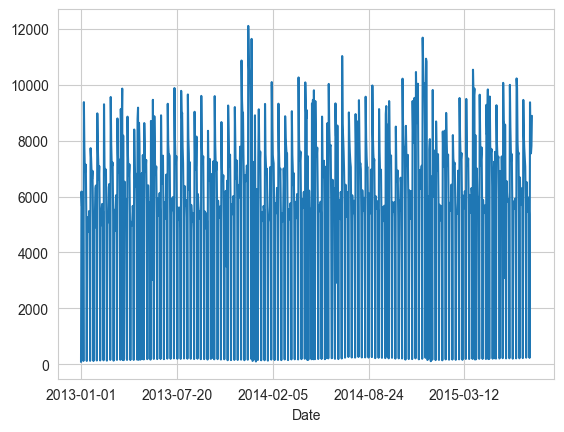

In [45]:
# Log visualization steps

try:
    # Visualization, e.g., plotting sales trends
    sales_trends.plot()
    plt.show()
    logging.info("Sales trend visualization completed successfully")
except Exception as e:
    logging.error("Sales trend visualization failed: %s", e)
